Accuracy:  0.92
Precision:  0.8888888888888888
Recall:  0.8888888888888888
Precision:  1.0
Recall:  1.0
Precision:  0.8947368421052632
Recall:  0.8947368421052632

Decision Tree Structure:
?(attr petal length <= 1.90)
    Yes: Class: setosa
    No: ?(attr petal length <= 4.80)
        Yes: ?(attr petal width <= 1.60)
            Yes: Class: versicolor
            No: ?(attr sepal length <= 5.95)
                Yes: Class: versicolor
                No: Class: virginica
        No: ?(attr petal width <= 1.70)
            Yes: ?(attr petal width <= 1.50)
                Yes: Class: virginica
                No: Class: versicolor
            No: Class: virginica



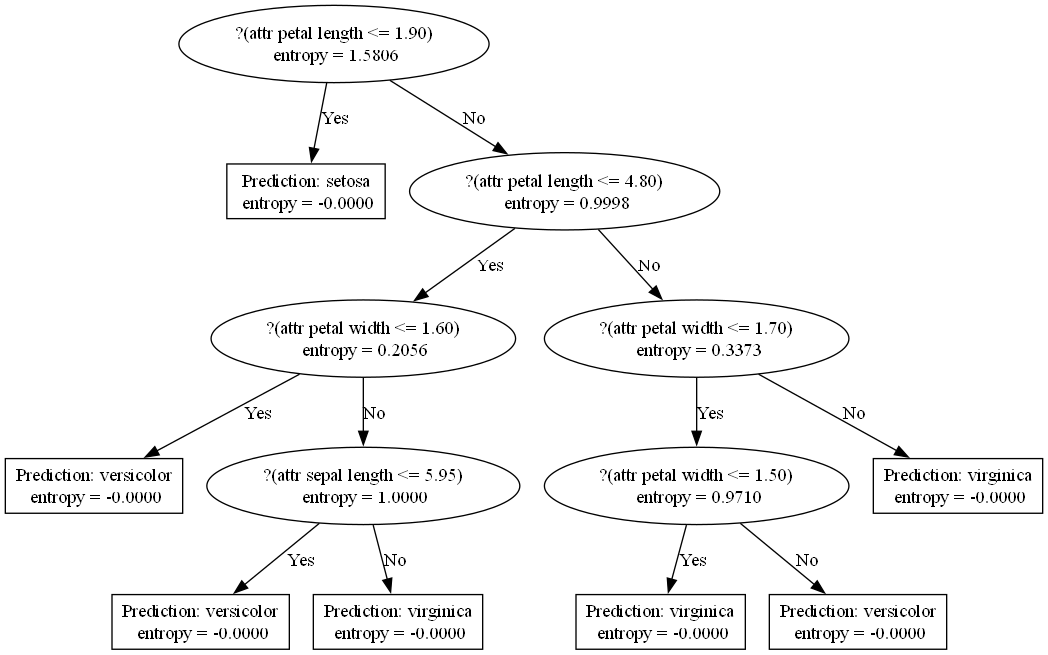

In [1]:
import sys
import os

# Add the path to the directory containing tree.py
sys.path.append(os.path.abspath("../"))

from tree.base import DecisionTree
from metrics import *
import numpy as np
from IPython.display import Image, display

np.random.seed(42)

from sklearn.datasets import load_iris as load
data = load()
X,y = data.data,data.target
idx = np.arange(X.shape[0])
np.random.shuffle(idx)
X = X[idx]
y = y[idx]
X = pd.DataFrame(X)
X.columns = ["sepal length","sepal width","petal length","petal width"]
y = pd.Series(y)
# get the y values
y = y.apply(lambda x: data.target_names[x])
test_size = len(X)//3
X_train,y_train = X[:-test_size],y[:-test_size]
X_test,y_test =X[-test_size:],y[-test_size:]
tree = DecisionTree(criterion="information_gain")
tree.fit(X_train,y_train)
y_hat = tree.predict(X_test)
print("Accuracy: ", accuracy(y_hat, y_test))
for cls in y.unique():
    print("Precision: ", precision(y_hat, y_test, cls))
    print("Recall: ", recall(y_hat, y_test, cls))
tree.plot(path="./Images/test")

Accuracy:  0.94
Precision:  0.9411764705882353
Recall:  0.8888888888888888
Precision:  1.0
Recall:  1.0
Precision:  0.9
Recall:  0.9473684210526315


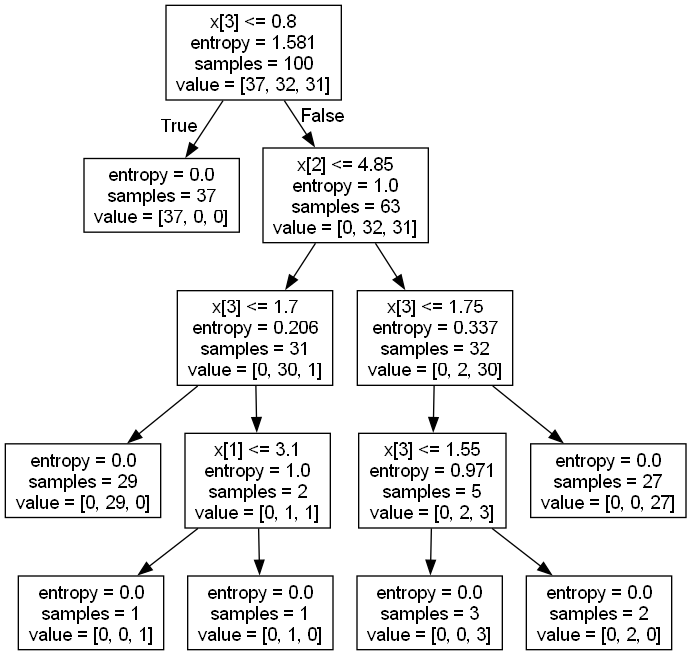

In [2]:
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as sktree

sk_tree = DecisionTreeClassifier(criterion="entropy")
sk_tree.fit(X_train,y_train)
y_hat = sk_tree.predict(X_test)
print("Accuracy: ", accuracy(pd.Series(y_hat), y_test))
for cls in y.unique():
    print("Precision: ", precision(pd.Series(y_hat), y_test, cls))
    print("Recall: ", recall(pd.Series(y_hat), y_test, cls))

dot_file = "Images/sk_tree.dot"
png_file = "Images/sk_tree.png"
sktree.export_graphviz(sk_tree, out_file=dot_file)

# Convert the .dot file to a .png file using dot
# !dot -Tpng Images/sk_tree.dot -o Images/sk_tree.png
os.system(f'dot -Tpng {dot_file} -o {png_file}')

os.remove(dot_file)

display(Image(png_file))